# Exp_4: Design, Train and Test a recurrent neural network (RNN) on a dataset to predict the next number in the following sequence X = [1,4,7,11,14].

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Define the RNN model
class RNNPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNPredictor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, h):
        out, h = self.rnn(x, h)
        out = self.fc(out[:, -1, :])  # Get last time step output
        return out, h

In [ ]:
# Generate data
def create_data(sequence):
    X, Y = [], []
    for i in range(len(sequence) - 1):
        X.append([sequence[i]])
        Y.append(sequence[i+1])
    return torch.tensor(X, dtype=torch.float32).unsqueeze(1), torch.tensor(Y, dtype=torch.float32)

In [ ]:
# Define sequence and data
sequence = [1, 4, 7, 11, 14, 17, 20]
X_train, Y_train = create_data(sequence)

In [ ]:
X_train, Y_train

In [ ]:
# Model parameters
input_size = 1
hidden_size = 16
output_size = 1
num_layers = 1

In [ ]:
# Initialize model, loss, and optimizer
model = RNNPredictor(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    batch_size = X_train.shape[0]  # Get batch size dynamically
    h = torch.zeros(num_layers, batch_size, hidden_size)  # Initialize hidden state
    
    optimizer.zero_grad()
    output, _ = model(X_train, h)
    loss = criterion(output.squeeze(), Y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [ ]:
# Testing the model
h = torch.zeros(num_layers, 1, hidden_size)  # Batch size = 1 for testing
x_test = torch.tensor([[14]], dtype=torch.float32).unsqueeze(0)  # Shape: (1, 1, 1)
predicted, _ = model(x_test, h)
print(f'Predicted next number: {predicted.item():.2f}')

# What are my eq's in RNN model h(t) = tanh(h(t-1)*Wh + x(t))*Wx + bh), Y = sigma(h(t)*wy + by)

In [1]:
import numpy as np

In [2]:
class SimpleRNNCell:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size

        # Weight initialization
        self.W_x = np.random.randn(hidden_size, input_size)*0.1
        self.W_h = np.random.randn(hidden_size, hidden_size)*0.1
        self.b_h = np.zeros((hidden_size,1))
        self.W_y = np.random.randn(output_size, hidden_size) * 0.1
        self.b_y = np.zeros((output_size, 1))

    def forward(self, x_t, h_prev):
        # Compute new hidden state
        h_t = np.tanh(np.dot(self.W_x, x_t) + np.dot(self.W_h, h_prev) + self.b_h)
        
        # Compute output
        y_t = np.dot(self.W_y, h_t) + self.b_y
        
        return h_t, y_t

In [3]:
# Training data
#sequence = np.array([1, 4, 7, 11, 14])
sequence = np.array([1, 2, 3,4,5])
X_train = sequence[:-1].reshape(-1, 1, 1)  # Inputs: [1], [4], [7], [11]
Y_train = sequence[1:].reshape(-1, 1, 1)   # Targets: [4], [7], [11], [14]

In [4]:
# Hyperparameters
input_size = 1
hidden_size = 5
output_size = 1
learning_rate = 0.01
epochs = 500

In [5]:
# Initialize RNN cell
rnn_cell = SimpleRNNCell(input_size, hidden_size, output_size)

In [6]:
# Training loop
h_prev = np.zeros((hidden_size, 1))  # Initial hidden state
for epoch in range(epochs):
    total_loss = 0
    
    for i in range(len(X_train)):
        x_t = X_train[i].reshape(1, 1)
        y_true = Y_train[i].reshape(1, 1)
        
        # Forward pass
        h_t, y_pred = rnn_cell.forward(x_t, h_prev)
        
        # Compute loss (Mean Squared Error)
        loss = np.square(y_true - y_pred).sum()
        total_loss += loss
        
        # Backpropagation (Gradient Descent)
        dL_dy = -2 * (y_true - y_pred)  # Gradient of loss w.r.t output
        dL_dWy = np.dot(dL_dy, h_t.T)
        dL_dby = dL_dy
        
        dL_dh = np.dot(rnn_cell.W_y.T, dL_dy) * (1 - h_t**2)  # tanh derivative
        dL_dWx = np.dot(dL_dh, x_t.T)
        dL_dWh = np.dot(dL_dh, h_prev.T)
        dL_dbh = dL_dh
        
        # Update weights
        rnn_cell.W_y -= learning_rate * dL_dWy
        rnn_cell.b_y -= learning_rate * dL_dby
        rnn_cell.W_x -= learning_rate * dL_dWx
        rnn_cell.W_h -= learning_rate * dL_dWh
        rnn_cell.b_h -= learning_rate * dL_dbh
        
        h_prev = h_t  # Update hidden state for next time step
    
    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

Epoch 50, Loss: 0.2092
Epoch 100, Loss: 0.0850
Epoch 150, Loss: 0.0157
Epoch 200, Loss: 0.0014
Epoch 250, Loss: 0.0001
Epoch 300, Loss: 0.0000
Epoch 350, Loss: 0.0000
Epoch 400, Loss: 0.0000
Epoch 450, Loss: 0.0000
Epoch 500, Loss: 0.0000


In [8]:
# Testing the RNN
h_prev = np.zeros((hidden_size, 1))
x_test = np.array([[5]])  # Predict next number
h_t, y_pred = rnn_cell.forward(x_test, h_prev)
print(f'Predicted next number: {y_pred.item():.2f}')

Predicted next number: 3.47


In [9]:
# Calculate total trainable parameters
def count_parameters():
    param_count = (
        rnn_cell.W_x.size +  # Input weight
        rnn_cell.W_h.size +  # Hidden weight
        rnn_cell.b_h.size +  # Hidden bias
        rnn_cell.W_y.size +  # Output weight
        rnn_cell.b_y.size    # Output bias
    )
    return param_count

print(f'Total trainable parameters: {count_parameters()}')

Total trainable parameters: 41


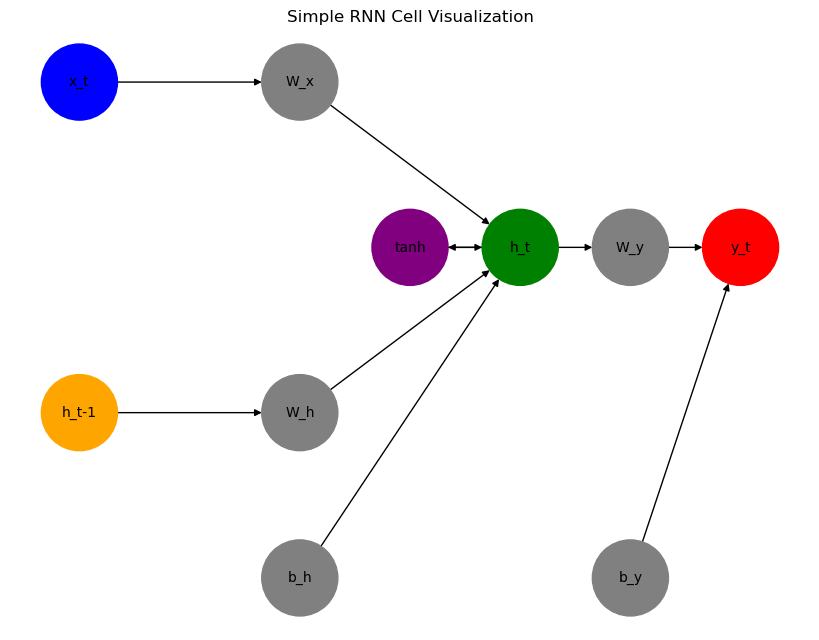

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("x_t", color="blue")
G.add_node("h_t-1", color="orange")
G.add_node("h_t", color="green")
G.add_node("y_t", color="red")
G.add_node("W_x", color="gray")
G.add_node("W_h", color="gray")
G.add_node("W_y", color="gray")
G.add_node("b_h", color="gray")
G.add_node("b_y", color="gray")
G.add_node("tanh", color="purple")

# Add edges
edges = [
    ("x_t", "W_x"), ("W_x", "h_t"),
    ("h_t-1", "W_h"), ("W_h", "h_t"),
    ("b_h", "h_t"),
    ("h_t", "tanh"), ("tanh", "h_t"),
    ("h_t", "W_y"), ("W_y", "y_t"),
    ("b_y", "y_t")
]

G.add_edges_from(edges)

# Define positions
pos = {
    "x_t": (-1, 1), "W_x": (0, 1), "h_t-1": (-1, 0), "W_h": (0, 0),
    "h_t": (1, 0.5), "tanh": (0.5, 0.5), "W_y": (1.5, 0.5), "y_t": (2, 0.5),
    "b_h": (0, -0.5), "b_y": (1.5, -0.5)
}

# Draw the graph
plt.figure(figsize=(8, 6))
colors = [G.nodes[n]["color"] for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000, edge_color="black", font_size=10)
plt.title("Simple RNN Cell Visualization")
plt.show()

# Hidden States = 5, h_t = 5, How many inputs for 5 hidden states, = 5 with its own weight. W_x = 5x1 = 5
# W_h = 5(h_t) X 5(h_t-1) = 25
# bh = 5
# W_y = 5 X 1 = 5
# b_y = 1
# Total Trainable Parameters = 41